In [1]:
%pip install pandas numpy matplotlib seaborn scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
# 1. Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, classification_report


In [8]:
# 2. Load Reduced Dataset
df = pd.read_csv("D:/Omar/Projects/Ai/Sprints/Heart_Disease_Project/data/reduced_heart.csv")

X = df.drop("target", axis=1)
y = df["target"]

# Convert to binary classification
y = (y > 0).astype(int)

print("Dataset shape:", X.shape)
print("Class distribution:\n", y.value_counts())


Dataset shape: (303, 13)
Class distribution:
 target
0    164
1    139
Name: count, dtype: int64


In [9]:
# 3. Split Train/Test (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)


Train shape: (242, 13)
Test shape: (61, 13)


In [10]:
# 4. Define Models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "SVM": SVC(probability=True, random_state=42)
}


In [11]:
# 5. Train & Evaluate Models
results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None
    
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)  # binary now works
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    results.append([name, acc, prec, rec, f1])
    
    print(f"\n{name} Classification Report:")
    print(classification_report(y_test, y_pred))



Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.88      0.89        33
           1       0.86      0.89      0.88        28

    accuracy                           0.89        61
   macro avg       0.88      0.89      0.88        61
weighted avg       0.89      0.89      0.89        61


Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.82      0.81        33
           1       0.78      0.75      0.76        28

    accuracy                           0.79        61
   macro avg       0.79      0.78      0.78        61
weighted avg       0.79      0.79      0.79        61


Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.85      0.85        33
           1       0.82      0.82      0.82        28

    accuracy                           0.84        61
   macro

In [12]:
# 6. Results Table
results_df = pd.DataFrame(results, columns=["Model", "Accuracy", "Precision", "Recall", "F1-score"])
print("\nModel Performance Summary:")
display(results_df)



Model Performance Summary:


,Model,Accuracy,Precision,Recall,F1-score
0,Logistic Regression,0.885246,0.862069,0.892857,0.877193
1,Decision Tree,0.786885,0.777778,0.750000,0.763636
2,Random Forest,0.836066,0.821429,0.821429,0.821429
3,SVM,0.852459,0.827586,0.857143,0.842105


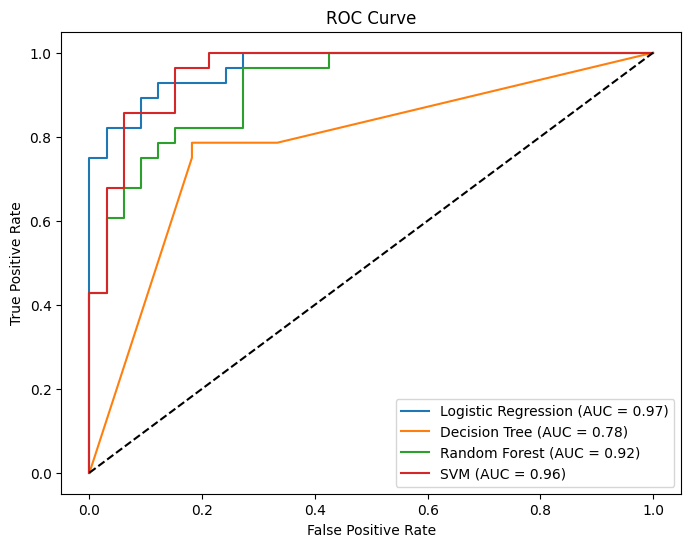

In [13]:
# 7. ROC Curves & AUC
plt.figure(figsize=(8,6))

for name, model in models.items():
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_test)[:, 1]
        fpr, tpr, _ = roc_curve(y_test, y_prob)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()
